In [4]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature.csv")
pf = data.copy()

In [3]:
pf.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [4]:
unique_dates = pf['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = pf['Date'] == date  
    test_data = pf[date_wise]
    
    confirmed_cases.append(test_data['Cumulative_cases'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Cumulative_cases' : confirmed_cases}
df = pd.DataFrame(df)

In [5]:
df.head()

,Date,Cumulative_cases
0,22-01-2020,554
1,23-01-2020,653
2,24-01-2020,939
3,25-01-2020,1432
4,26-01-2020,2113


In [6]:
df=df.rename(columns={'Date':'ds', 'Cumulative_cases':'y'})

In [7]:
df.head()

,ds,y
0,22-01-2020,554
1,23-01-2020,653
2,24-01-2020,939
3,25-01-2020,1432
4,26-01-2020,2113


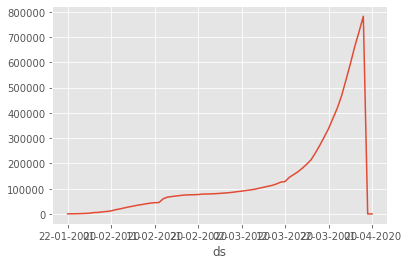

In [8]:
df.set_index('ds').y.plot()

In [9]:
df['y'] = np.log(df['y'])


In [10]:
df.tail()

,ds,y
66,28-03-2020,13.400493
67,29-03-2020,13.486623
68,30-03-2020,13.569555
69,31-03-2020,5.278115
70,01-04-2020,5.476464


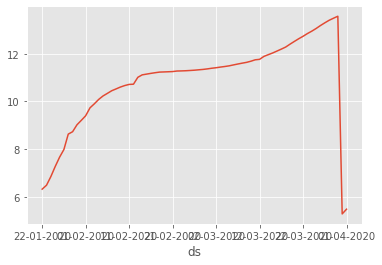

In [11]:
df.set_index('ds').y.plot()

In [12]:
model = Prophet()
model.fit(df);


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
weekly_seasonality=True

In [14]:
future = model.make_future_dataframe(periods=30, freq = 'd')
future.tail()

,ds
96,2020-12-29
97,2020-12-30
98,2020-12-31
99,2021-01-01
100,2021-01-02


In [15]:

forecast = model.predict(future)

In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
96,2020-12-29,12.420820,9.844077,14.345485,12.420637,12.420977,-0.314885,-0.314885,-0.314885,-0.314885,-0.314885,-0.314885,0.0,0.0,0.0,12.105935
97,2020-12-30,12.426673,9.926905,14.549872,12.426483,12.426841,-0.334428,-0.334428,-0.334428,-0.334428,-0.334428,-0.334428,0.0,0.0,0.0,12.092246
98,2020-12-31,12.432526,10.126720,14.390042,12.432326,12.432706,-0.224346,-0.224346,-0.224346,-0.224346,-0.224346,-0.224346,0.0,0.0,0.0,12.208181
99,2021-01-01,12.438379,10.543057,15.025446,12.438170,12.438567,0.265002,0.265002,0.265002,0.265002,0.265002,0.265002,0.0,0.0,0.0,12.703381
100,2021-01-02,12.444232,10.043679,14.509590,12.444012,12.444426,-0.131227,-0.131227,-0.131227,-0.131227,-0.131227,-0.131227,0.0,0.0,0.0,12.313005


In [17]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-12-29,12.105935,9.844077,14.345485
97,2020-12-30,12.092246,9.926905,14.549872
98,2020-12-31,12.208181,10.126720,14.390042
99,2021-01-01,12.703381,10.543057,15.025446
100,2021-01-02,12.313005,10.043679,14.509590


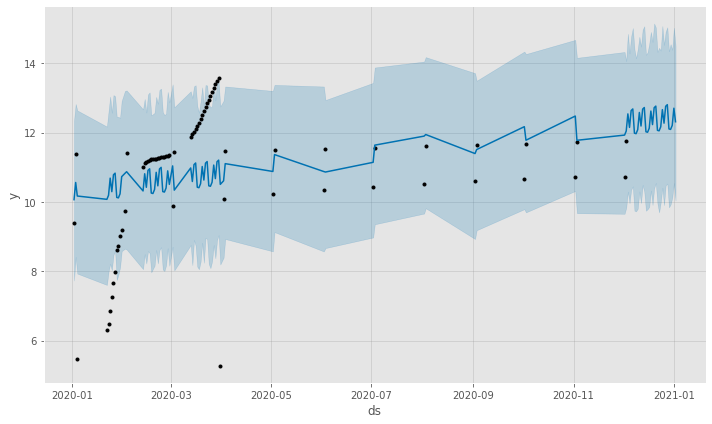

In [18]:
model.plot(forecast);

In [1]:
#Here is the problem

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

ImportError: DLL load failed: Δεν ήταν δυνατό να εντοπιστεί η καθορισμένη λειτ. μονάδα.

In [10]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature.csv")
df = data.copy()

In [11]:
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [12]:
df['Date'].min(), df['Date'].max()

('01-02-2020', '31-03-2020')

In [13]:
df.drop(['State','Cumulative_death','Daily_cases','Daily_death','Latitude','Longitude','Wind_speed','Precipitation' , 'Fog_Presence'], axis=1, inplace=True)
df = df.sort_values('Date')
df.isnull().sum()

Date                0
Country             0
Cumulative_cases    0
Temperature         0
dtype: int64

In [15]:
df = df.groupby('Date')['Cumulative_cases'].sum().reset_index()

In [16]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

In [14]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='ignore')
print(df['Date'])

10017   2020-02-01
6498    2020-02-01
19470   2020-02-01
13467   2020-02-01
6429    2020-02-01
           ...    
4634    2020-01-31
12224   2020-01-31
4427    2020-01-31
9533    2020-01-31
69      2020-03-31
Name: Date, Length: 20288, dtype: datetime64[ns]


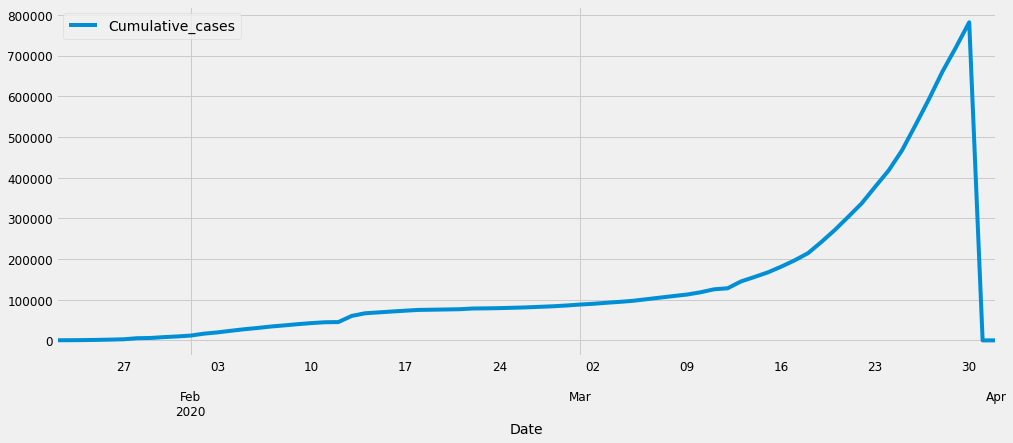

In [17]:
df.plot(figsize=(15, 6))
plt.show()

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

NameError: name 'sm' is not defined

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature.csv",squeeze=True)
df = data.copy()

In [23]:
df.head()


,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [24]:
unique_dates = df['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = df['Date'] == date  
    test_data = df[date_wise]
    
    confirmed_cases.append(test_data['Cumulative_cases'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Cumulative_cases' : confirmed_cases}
df = pd.DataFrame(df)

In [25]:
df.head()

,Date,Cumulative_cases
0,22-01-2020,554
1,23-01-2020,653
2,24-01-2020,939
3,25-01-2020,1432
4,26-01-2020,2113


In [26]:
df.set_index('Date',inplace=True) #set date as the index

In [27]:
df.head()

,Cumulative_cases
Date,
22-01-2020,554
23-01-2020,653
24-01-2020,939
25-01-2020,1432
26-01-2020,2113


In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
series_value = df.values

In [30]:
type(series_value)

numpy.ndarray

In [31]:
df.size

71

In [32]:
df.tail()


,Cumulative_cases
Date,
28-03-2020,660329
29-03-2020,719724
30-03-2020,781957
31-03-2020,196
01-04-2020,239


In [33]:
df.describe()

,Cumulative_cases
count,71.000000
mean,137194.873239
std,176295.724238
min,196.000000
25%,32581.500000
50%,79510.000000
75%,136680.000000
max,781957.000000


In [34]:
df = df[0:71]

In [35]:
df.describe()

,Cumulative_cases
count,71.000000
mean,137194.873239
std,176295.724238
min,196.000000
25%,32581.500000
50%,79510.000000
75%,136680.000000
max,781957.000000


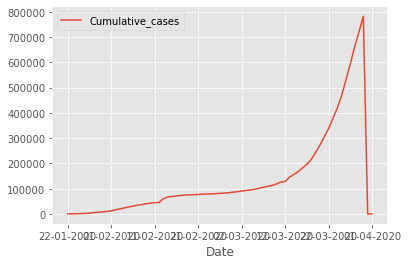

In [36]:
df.plot()

In [41]:
df_mean = df.rolling(window=15).mean()

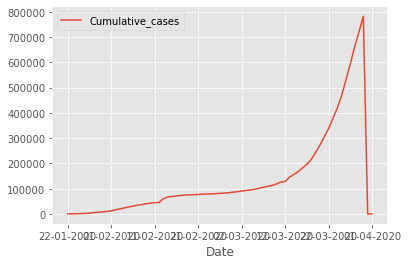

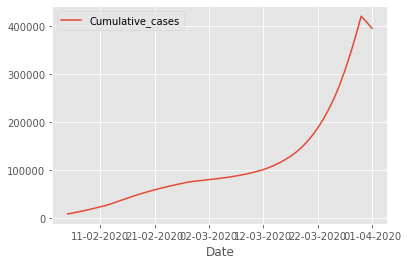

In [42]:
df.plot()
df_mean.plot()

In [44]:
value = pd.DataFrame(series_value)

In [48]:
df1 = pd.concat([value,value.shift(1)],axis=1)

In [49]:
df1.head()


,0,0
0,554,NaN
1,653,554.0
2,939,653.0
3,1432,939.0
4,2113,1432.0


In [50]:
df1.columns = ['Actual_cases','Forecast_cases']

In [51]:
df1.head()

,Actual_cases,Forecast_cases
0,554,NaN
1,653,554.0
2,939,653.0
3,1432,939.0
4,2113,1432.0


In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

ImportError: DLL load failed: Δεν ήταν δυνατό να εντοπιστεί η καθορισμένη λειτ. μονάδα.